# first I will try baseline_cnn and get it to overfit to a small 100 training example dataset (via upsampling), keeping all else equal

1) Imports

In [6]:
from baseline_cnn import createModel
from utils.config import Config
from torch.utils.data import DataLoader 
from torch.utils.data.sampler import SubsetRandomSampler, WeightedRandomSampler
from utils import train, predict
from utils import NaiveDataset, splitIndices
from utils.constants import NUM_CLASSES, TRAIN_DATA_PATH, TRAIN_LABELS_PATH, NUM_TRAIN, TEST_DATA_PATH, TEST_LABELS_PATH, LABEL_MAP, LABEL_LIST
from utils import visualize
import pandas as pd
from utils.train import check_per_class_accuracy
from sklearn.preprocessing import MultiLabelBinarizer
import torch
from torch import nn

from scipy.optimize import nnls

from IPython.display import Image, display

import numpy as np

from matplotlib.pyplot import imshow
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'

2) Args class declaration (passthrough for struct)

In [2]:
class Args:
    pass
args = Args()

3) Args for experiment plus experiment

In [4]:
args.test = False
args.bs = 10
args.e = 10 
args.nt = 100
args.nv = 20
args.lr = 1e-3
args.gpu = True
args.pe = 1
args.ee = None
args.seed = 231
args.title = "baseline_cnn_tanuj"
args.path = "./experiments"
args.checkpoint = ""
args.predict = False
args.save_every = False
args.no_save = False

In [5]:
config = Config(args)
config.log(config)

train_dataset = NaiveDataset(TRAIN_DATA_PATH, TRAIN_LABELS_PATH)
train_idx, val_idx = splitIndices(train_dataset, config, shuffle = False)

train_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(val_idx)

train_loader = DataLoader(train_dataset, batch_size = config.batch_size, num_workers = 8, sampler = train_sampler)
val_loader = DataLoader(train_dataset, batch_size = config.batch_size, num_workers = 8, sampler = val_sampler)

config.train_loader = train_loader
config.val_loader = val_loader

# Create Model
model = createModel(config)

# Train and Eval Model
results = train(model, config)

Config for experiment:   baseline_cnn_tanuj_0601_05.13.21
	title: baseline_cnn_tanuj
	gpu: True
	epochs: 10
	batch_size: 10
	learning_rate: 0.001
	num_train (if None using all): 100
	num_val (if None using all): 20

	save_dest: ./experiments/baseline_cnn_tanuj_0601_05.13.21
	print_every: 1
	eval_every: None

40479
Number of model parameters: 268486449


Starting epoch 1 / 10
t = 1, loss = 0.6807
t = 2, loss = 2.3882
t = 3, loss = 2.2666
t = 4, loss = 2.6012
t = 5, loss = 2.3204
t = 6, loss = 1.6254
t = 7, loss = 1.8893
t = 8, loss = 3.2969
t = 9, loss = 2.4819
t = 10, loss = 2.1130
Finished Epoch 1/10
Evaluating...
F2 score {train} : Got 72.74
Global recall {train} : Got 1540 / 1700 correct (90.59)
All or none acc {train} : Got 32 / 100 correct (32.00)
F2 score {val} : Got 72.20
Global recall {val} : Got 307 / 340 correct (90.29)
All or none acc {val} : Got 6 / 20 correct (30.00)
Saving checkpoint...baseline_cnn_tanuj_0601_05.13.21_1.ckpt
New best model: baseline_cnn_tanuj_0601_05.13.2

4) Plot results of experiment #1

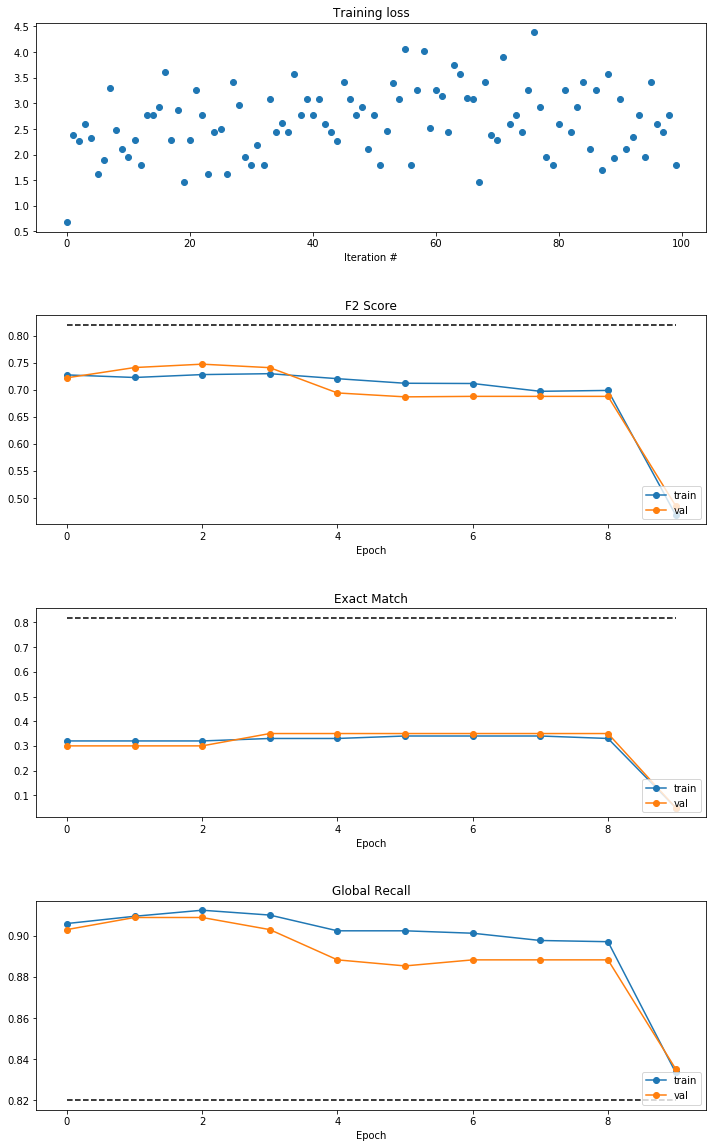

In [6]:
visualize.plot_results(results, config, display=True)

In [7]:
make_predictions = True
if make_predictions:
  predict(model, config, train_loader, dataset = "train")
  predict(model, config, val_loader, dataset = "val")

Predicting on train
0
5
Done. Made csv: ./experiments/baseline_cnn_tanuj_0601_05.13.21/logs/submission_tt_v3_train.csv
Predicting on val
0
Done. Made csv: ./experiments/baseline_cnn_tanuj_0601_05.13.21/logs/submission_tt_v3_val.csv


Analyze prediction csv

In [12]:
train_df = pd.read_csv('./experiments/baseline_cnn_tanuj_0601_05.13.21/logs/submission_tt_v3_train.csv')
train_df

,image_name,tags,labels
0,train_45,agriculture partly_cloudy primary,clear primary
1,train_116,agriculture partly_cloudy primary,agriculture clear primary road
2,train_96,agriculture partly_cloudy primary,clear primary
3,train_66,partly_cloudy primary,agriculture clear primary road
4,train_75,partly_cloudy primary,agriculture clear primary road water
5,train_83,partly_cloudy primary,clear primary
6,train_113,agriculture clear partly_cloudy primary,agriculture clear primary
7,train_54,agriculture clear partly_cloudy primary,clear primary
8,train_56,partly_cloudy primary,clear primary water
9,train_69,agriculture clear partly_cloudy primary,clear primary


In [20]:
per_class_train_acc = check_per_class_accuracy(model, config, train_loader)
print(per_class_train_acc)
print(LABEL_MAP)

[ 0.41  0.99  0.96  0.98  1.    0.52  0.89  0.99  0.95  0.91  0.97  0.15
  0.87  0.78  1.    0.99  0.81]
{0: 'agriculture', 1: 'artisinal_mine', 2: 'bare_ground', 3: 'blooming', 4: 'blow_down', 5: 'clear', 6: 'cloudy', 7: 'conventional_mine', 8: 'cultivation', 9: 'habitation', 10: 'haze', 11: 'partly_cloudy', 12: 'primary', 13: 'road', 14: 'selective_logging', 15: 'slash_burn', 16: 'water'}


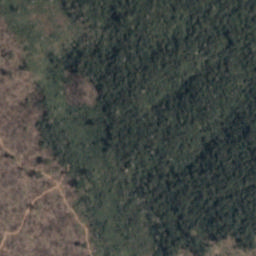

image_name                            train_116
tags          agriculture partly_cloudy primary
labels           agriculture clear primary road
Name: 1, dtype: object


In [99]:
#Display image 116
display(Image(filename='./input/train-jpg/train_116.jpg'))
print(train_df.iloc[1])

In [102]:
from PIL import Image
im = Image.open('./input/train-jpg/train_116.jpg')
im = np.array(im)[:,:,:3]
print(im.shape)

(256, 256, 3)


In [6]:
#get counts of each class
train_full_df = pd.read_csv(TRAIN_LABELS_PATH)
mlb = MultiLabelBinarizer(classes = LABEL_LIST)
labels_words = [set([word for word in row.split()]) for row in train_full_df['tags']]
labels_k_hot = mlb.fit_transform(labels_words)
print(labels_k_hot.shape)
labels_sums = np.sum(labels_k_hot,axis=0)
print("labels_sums shape: ",labels_sums.shape)
print("labels_sums: ",labels_sums)
total_labels_count = np.sum(labels_sums)
print("total_labels_count: ",total_labels_count)
labels_freq = labels_sums/total_labels_count
print("labels_freq: ",labels_freq)
labels_weights = 1./(labels_freq*10)
print("labels_weights: ",labels_weights)

(40479, 17)
labels_sums shape:  (17,)
labels_sums:  [12315   339   862   332    98 28431  2089   100  4477  3660  2697  7261
 37513  8071   340   209  7411]
total_labels_count:  116205
labels_freq:  [ 0.10597651  0.00291726  0.00741793  0.00285702  0.00084334  0.24466245
  0.01797685  0.00086055  0.03852674  0.03149606  0.02320898  0.0624844
  0.32281743  0.06945484  0.00292586  0.00179855  0.06377522]
labels_weights:  [   0.94360536   34.27876106   13.48085847   35.00150602  118.57653061
    0.40872639    5.56270943  116.205         2.59559973    3.175
    4.30867631    1.60039939    0.30977261    1.43978441   34.17794118
   55.60047847    1.56800702]


In [11]:
args.test = False
args.bs = 10
args.e = 10
args.nt = 32000
args.nv = 8000
args.lr = 1e-3
args.gpu = True
args.pe = 100
args.ee = None
args.seed = 231
args.title = "baseline_cnn_tanuj_weighted"
args.path = "./experiments"
args.checkpoint = ""
args.predict = False
args.save_every = False
args.no_save = False

In [9]:
from utils.layers import Flatten
from torch.autograd import Variable
import copy

def createModel(config):
    model = nn.Sequential(
                      # Conv_Relu_BatchNorm --> 32 x 32
                      nn.Conv2d(3, 32, kernel_size = 7, stride = 2, padding = 2),
                      nn.ReLU(inplace=True),
                      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True),
                      nn.MaxPool2d(4, stride=2),
      
                      # Conv_Relu_BatchNorm_Maxpool --> 32 x 14 x 14
                      nn.Conv2d(32, 32, kernel_size=7, stride=2, padding = 2),
                      nn.ReLU(inplace=True),
                      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True),
                      nn.MaxPool2d(2, stride=2),
      
                      # Aggregation Layers
                      Flatten(), # see above for explanation
                      nn.Linear(7200, 2048), # affine layer
                      nn.ReLU(inplace = False),
                      nn.Dropout(p=0.45, inplace = False),
                      nn.Linear(2048, NUM_CLASSES), # affine layer
            )
    model = model.type(config.dtype)


    #check output dimensions before flattening
    #model_gpu = copy.deepcopy(model).type(config.dtype)
    #model_gpu.eval()
    #x = torch.randn(1, 3, 256, 256).type(config.dtype)
    #x_var = Variable(x.type(config.dtype)) # Construct a PyTorch Variable out of your input data
    #scores = model_gpu(x_var)        # Feed it through the model! 
    #print(scores.size())
    return model
#createModel(config)

In [12]:
config = Config(args)
config.log(config)

train_dataset = NaiveDataset(TRAIN_DATA_PATH, TRAIN_LABELS_PATH)
train_idx, val_idx = splitIndices(train_dataset, config, shuffle = False)

train_sampler = SubsetRandomSampler(train_idx)
val_sampler = SubsetRandomSampler(val_idx)

train_loader = DataLoader(train_dataset, batch_size = config.batch_size, num_workers = 8, sampler = train_sampler)
val_loader = DataLoader(train_dataset, batch_size = config.batch_size, num_workers = 8, sampler = val_sampler)

config.train_loader = train_loader
config.val_loader = val_loader

# Create Model
model = createModel(config)

# Create Loss function
loss_fn_weighted = nn.MultiLabelSoftMarginLoss(weight=torch.from_numpy(labels_weights)).type(config.dtype)

# Train and Eval Model
results = train(model, config, loss_fn=loss_fn_weighted)

Config for experiment:   baseline_cnn_tanuj_weighted_0601_21.46.53
	title: baseline_cnn_tanuj_weighted
	gpu: True
	epochs: 10
	batch_size: 10
	learning_rate: 0.001
	num_train (if None using all): 32000
	num_val (if None using all): 8000

	save_dest: ./experiments/baseline_cnn_tanuj_weighted_0601_21.46.53
	print_every: 100
	eval_every: None

40479
Number of model parameters: 14837553


Starting epoch 1 / 10
t = 100, loss = 1.0655
t = 200, loss = 0.6463
t = 300, loss = 0.6301
t = 400, loss = 0.6475
t = 500, loss = 0.6709
t = 600, loss = 0.4742
t = 700, loss = 0.9606
t = 800, loss = 1.9810
t = 900, loss = 0.3203
t = 1000, loss = 1.0479
t = 1100, loss = 0.6310
t = 1200, loss = 0.5083
t = 1300, loss = 0.9307
t = 1400, loss = 1.1689
t = 1500, loss = 0.4150
t = 1600, loss = 1.5980
t = 1700, loss = 0.2425
t = 1800, loss = 0.5242
t = 1900, loss = 0.3038
t = 2000, loss = 6.4811
t = 2100, loss = 0.4421
t = 2200, loss = 0.8369
t = 2300, loss = 2.2519
t = 2400, loss = 0.4715
t = 2500, loss = 7.3234

/home/cs231n/myVE35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


F2 score {val} : Got 78.11
Global recall {val} : Got 124080 / 136000 correct (91.24)
All or none acc {val} : Got 2944 / 8000 correct (36.80)
Saving checkpoint...baseline_cnn_tanuj_weighted_0601_21.46.53_1.ckpt
New best model: baseline_cnn_tanuj_weighted_0601_21.46.53_1.ckpt with Val F2:  0.7810723815196248
Done saving checkpoint.

Starting epoch 2 / 10
t = 100, loss = 0.6450
t = 200, loss = 0.5856
t = 300, loss = 0.6966
t = 400, loss = 1.6467
t = 500, loss = 0.3307
t = 600, loss = 0.5173
t = 700, loss = 1.9234
t = 800, loss = 0.5023
t = 900, loss = 0.7861
t = 1000, loss = 0.4767
t = 1100, loss = 0.6402
t = 1200, loss = 0.3735
t = 1300, loss = 0.3007
t = 1400, loss = 2.5692
t = 1500, loss = 6.8522
t = 1600, loss = 2.0292
t = 1700, loss = 0.5013
t = 1800, loss = 0.7257
t = 1900, loss = 0.3695
t = 2000, loss = 1.6029
t = 2100, loss = 1.4276
t = 2200, loss = 1.5402
t = 2300, loss = 0.3152
t = 2400, loss = 0.5800
t = 2500, loss = 1.3918
t = 2600, loss = 0.6252
t = 2700, loss = 1.2169
t = 28

Process Process-137:
Process Process-143:
Process Process-140:
Process Process-138:
Process Process-141:
Process Process-139:
Process Process-142:
Process Process-16:
Process Process-144:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/pytho

KeyboardInterrupt: 

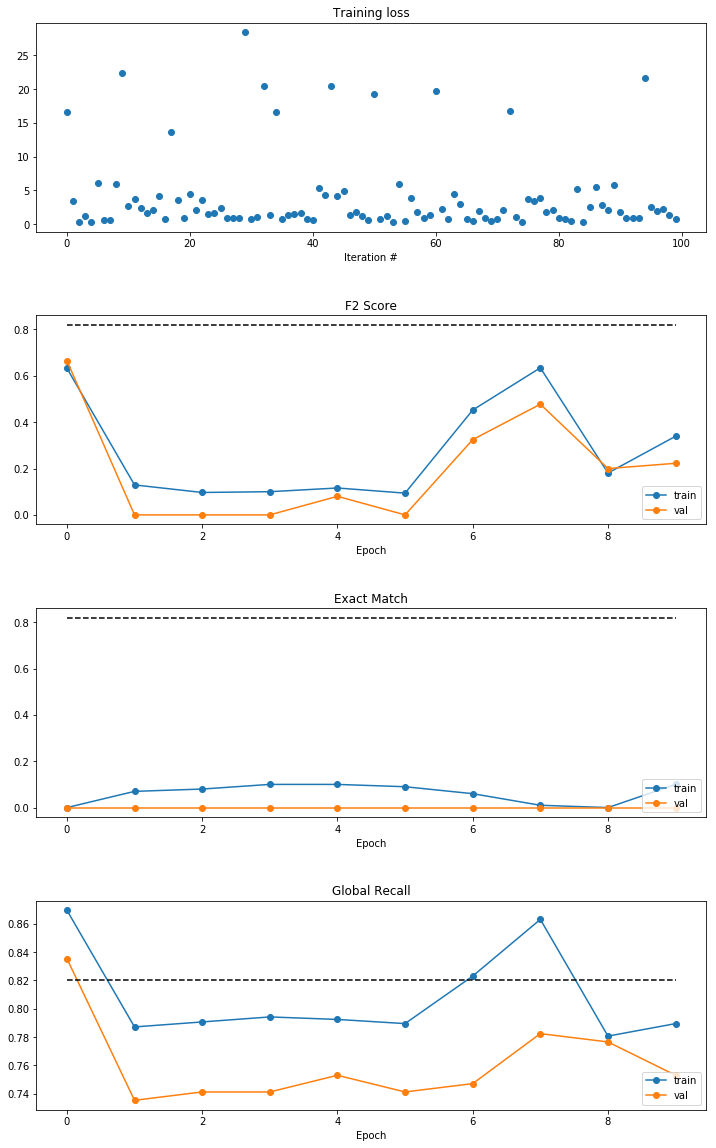

In [114]:
visualize.plot_results(results, config, display=True)

In [70]:
from scipy.optimize import nnls

np.set_printoptions(threshold=np.inf)
M_cpu = train_dataset.labels_tensor.cpu().numpy()
w_vec, res = np.linalg.lstsq(M_cpu.T,np.ones((17,)))[0:2]
print(max(w_vec),min(w_vec))
print(np.sum(w_vec),w_vec.shape)

0.0151350798988 -0.000422307913681
3.99992225721
0 (40479,)


In [71]:
args.test = False
args.bs = 10
args.e = 3
args.nt = 32000
args.nv = 8000
args.lr = 1e-3
args.gpu = True
args.pe = 100
args.ee = None
args.seed = 231
args.title = "baseline_cnn_tanuj_upsampled"
args.path = "./experiments"
args.checkpoint = ""
args.predict = False
args.save_every = False
args.no_save = False

In [72]:
from torch.utils.data.sampler import WeightedRandomSampler

config = Config(args)
config.log(config)

train_dataset = NaiveDataset(TRAIN_DATA_PATH, TRAIN_LABELS_PATH)
train_idx, val_idx = splitIndices(train_dataset, config, shuffle = False)

train_sampler = WeightedRandomSampler(weights = w_vec[train_idx], num_samples=config.num_train, replacement=False) #THIS IS DIFFERENT
val_sampler = WeightedRandomSampler(weights = w_vec[val_idx], num_samples=config.num_val, replacement=False) #THIS IS DIFFERENT.

train_loader = DataLoader(train_dataset, batch_size = config.batch_size, num_workers = 8, sampler = train_sampler)
val_loader = DataLoader(train_dataset, batch_size = config.batch_size, num_workers = 8, sampler = val_sampler)

config.train_loader = train_loader
config.val_loader = val_loader

# Create Model
model = createModel(config)

# Create Loss function
loss_fn = nn.MultiLabelSoftMarginLoss().type(config.dtype)

# Train and Eval Model
results = train(model, config, loss_fn=loss_fn)

Config for experiment:   baseline_cnn_tanuj_upsampled_0601_22.50.03
	title: baseline_cnn_tanuj_upsampled
	gpu: True
	epochs: 10
	batch_size: 10
	learning_rate: 0.001
	num_train (if None using all): 32000
	num_val (if None using all): 8000

	save_dest: ./experiments/baseline_cnn_tanuj_upsampled_0601_22.50.03
	print_every: 100
	eval_every: None

40479
Number of model parameters: 14837553


Starting epoch 1 / 10
t = 100, loss = 0.4597
t = 200, loss = 0.2600
t = 300, loss = 0.1819
t = 400, loss = 0.2891
t = 500, loss = 0.2464
t = 600, loss = 0.2281
t = 700, loss = 0.2239
t = 800, loss = 0.1790
t = 900, loss = 0.2212
t = 1000, loss = 0.1563
t = 1100, loss = 0.1683
t = 1200, loss = 0.2379
t = 1300, loss = 0.1808
t = 1400, loss = 0.1724
t = 1500, loss = 0.2077
t = 1600, loss = 0.1532
t = 1700, loss = 0.2096
t = 1800, loss = 0.2189
t = 1900, loss = 0.2025
t = 2000, loss = 0.1645
t = 2100, loss = 0.1645
t = 2200, loss = 0.3611
t = 2300, loss = 0.2253
t = 2400, loss = 0.1843
t = 2500, loss = 0.1

/home/cs231n/myVE35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


F2 score {val} : Got 82.00
Global recall {val} : Got 125937 / 136000 correct (92.60)
All or none acc {val} : Got 3569 / 8000 correct (44.61)
Saving checkpoint...baseline_cnn_tanuj_upsampled_0601_22.50.03_1.ckpt
New best model: baseline_cnn_tanuj_upsampled_0601_22.50.03_1.ckpt with Val F2:  0.8199594135280667
Done saving checkpoint.

Starting epoch 2 / 10
t = 100, loss = 0.3549
t = 200, loss = 0.2583
t = 300, loss = 0.2743
t = 400, loss = 0.2140
t = 500, loss = 0.1075
t = 600, loss = 0.2703
t = 700, loss = 0.1845
t = 800, loss = 0.2567
t = 900, loss = 0.2924
t = 1000, loss = 0.1858
t = 1100, loss = 0.1638
t = 1200, loss = 0.1575
t = 1300, loss = 0.1602
t = 1400, loss = 0.1886
t = 1500, loss = 0.1549
t = 1600, loss = 0.2549
t = 1700, loss = 0.1609
t = 1800, loss = 0.1995
t = 1900, loss = 0.2115
t = 2000, loss = 0.2816
t = 2100, loss = 0.1658
t = 2200, loss = 0.2215
t = 2300, loss = 0.1206
t = 2400, loss = 0.1798
t = 2500, loss = 0.1325
t = 2600, loss = 0.1592
t = 2700, loss = 0.1828
t = 

Process Process-284:
Process Process-288:
Process Process-282:
Process Process-285:
Process Process-281:
Process Process-286:
Process Process-287:
Process Process-283:
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstr

KeyboardInterrupt: 

In [81]:
args.test = False
args.bs = 10
args.e = 10
args.nt = 100
args.nv = 10
args.lr = 1e-3
args.gpu = True
args.pe = 100
args.ee = None
args.seed = 231
args.title = "baseline_cnn_tanuj_upsampled_std_nrm"
args.path = "./experiments"
args.checkpoint = ""
args.predict = False
args.save_every = False
args.no_save = False

from utils.layers import Flatten
from torch.autograd import Variable
import copy

def createModel(config):
    model = nn.Sequential(
                      # Conv_Relu_BatchNorm --> 32 x 32
                      nn.Conv2d(3, 32, kernel_size = 7, stride = 2, padding = 2),
                      nn.ReLU(inplace=True),
                      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True),
                      nn.MaxPool2d(4, stride=2),
      
                      # Conv_Relu_BatchNorm_Maxpool --> 32 x 14 x 14
                      nn.Conv2d(32, 32, kernel_size=7, stride=2, padding = 2),
                      nn.ReLU(inplace=True),
                      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True),
                      nn.MaxPool2d(2, stride=2),
      
                      # Aggregation Layers
                      Flatten(), # see above for explanation
                      nn.Linear(7200, 2048), # affine layer
                      nn.ReLU(inplace = False),
                      #nn.Dropout(p=0.45, inplace = False), #don't use dropout until I overfit..
                      nn.Linear(2048, NUM_CLASSES), # affine layer
            )
    model = model.type(config.dtype)


    #check output dimensions before flattening
    #model_gpu = copy.deepcopy(model).type(config.dtype)
    #model_gpu.eval()
    #x = torch.randn(1, 3, 256, 256).type(config.dtype)
    #x_var = Variable(x.type(config.dtype)) # Construct a PyTorch Variable out of your input data
    #scores = model_gpu(x_var)        # Feed it through the model! 
    #print(scores.size())
    return model
#createModel(config)

config = Config(args)
config.log(config)

train_dataset = NaiveDataset(TRAIN_DATA_PATH, TRAIN_LABELS_PATH)
train_idx, val_idx = splitIndices(train_dataset, config, shuffle = False)

eps = 1.
train_sampler = WeightedRandomSampler(weights = w_vec[train_idx]+min(w_vec[train_idx])+eps, num_samples=config.num_train, replacement=False) #THIS IS DIFFERENT
val_sampler = WeightedRandomSampler(weights = w_vec[val_idx]+min(w_vec[val_idx])+eps, num_samples=config.num_val, replacement=False) #THIS IS DIFFERENT.

train_loader = DataLoader(train_dataset, batch_size = config.batch_size, num_workers = 8, sampler = train_sampler)
val_loader = DataLoader(train_dataset, batch_size = config.batch_size, num_workers = 8, sampler = val_sampler)

config.train_loader = train_loader
config.val_loader = val_loader

# Create Model
model = createModel(config)

# Create Loss function
loss_fn = nn.MultiLabelSoftMarginLoss().type(config.dtype)

# Train and Eval Model
results = train(model, config, loss_fn=loss_fn)

Config for experiment:   baseline_cnn_tanuj_upsampled_std_nrm_0601_23.26.36
	title: baseline_cnn_tanuj_upsampled_std_nrm
	gpu: True
	epochs: 10
	batch_size: 10
	learning_rate: 0.001
	num_train (if None using all): 100
	num_val (if None using all): 10

	save_dest: ./experiments/baseline_cnn_tanuj_upsampled_std_nrm_0601_23.26.36
	print_every: 100
	eval_every: None

40479
Number of model parameters: 14837553


Starting epoch 1 / 10
Finished Epoch 1/10
Evaluating...
F2 score {train} : Got 62.40
Global recall {train} : Got 1495 / 1700 correct (87.94)
All or none acc {train} : Got 8 / 100 correct (8.00)
F2 score {val} : Got 60.88
Global recall {val} : Got 145 / 170 correct (85.29)
All or none acc {val} : Got 0 / 10 correct (0.00)
Saving checkpoint...baseline_cnn_tanuj_upsampled_std_nrm_0601_23.26.36_1.ckpt
New best model: baseline_cnn_tanuj_upsampled_std_nrm_0601_23.26.36_1.ckpt with Val F2:  0.6088033290239172
Done saving checkpoint.

Starting epoch 2 / 10
Finished Epoch 2/10
Evaluating...


/home/cs231n/myVE35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


F2 score {val} : Got 49.87
Global recall {val} : Got 138 / 170 correct (81.18)
All or none acc {val} : Got 0 / 10 correct (0.00)

Starting epoch 5 / 10
Finished Epoch 5/10
Evaluating...
F2 score {train} : Got 65.39
Global recall {train} : Got 1508 / 1700 correct (88.71)
All or none acc {train} : Got 6 / 100 correct (6.00)
F2 score {val} : Got 57.46
Global recall {val} : Got 144 / 170 correct (84.71)
All or none acc {val} : Got 0 / 10 correct (0.00)

Starting epoch 6 / 10
Finished Epoch 6/10
Evaluating...
F2 score {train} : Got 75.88
Global recall {train} : Got 1548 / 1700 correct (91.06)
All or none acc {train} : Got 32 / 100 correct (32.00)
F2 score {val} : Got 73.34
Global recall {val} : Got 150 / 170 correct (88.24)
All or none acc {val} : Got 2 / 10 correct (20.00)
Saving checkpoint...baseline_cnn_tanuj_upsampled_std_nrm_0601_23.26.36_6.ckpt
New best model: baseline_cnn_tanuj_upsampled_std_nrm_0601_23.26.36_6.ckpt with Val F2:  0.7333693267516797
Done saving checkpoint.

Starting e

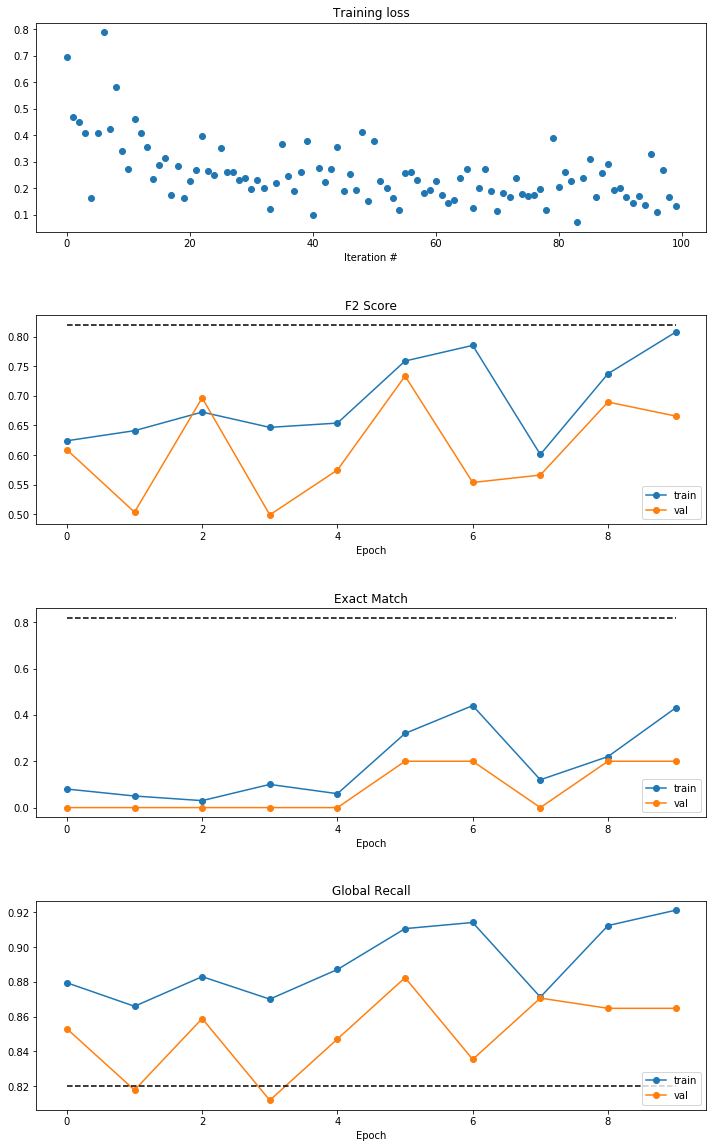

In [82]:
visualize.plot_results(results, config, display=True)

In [83]:
args.test = False
args.bs = 10
args.e = 10
args.nt = 100
args.nv = 10
args.lr = 1e-2
args.gpu = True
args.pe = 100
args.ee = None
args.seed = 231
args.title = "baseline_cnn_tanuj_upsampled_std_nrm"
args.path = "./experiments"
args.checkpoint = ""
args.predict = False
args.save_every = False
args.no_save = False

from utils.layers import Flatten
from torch.autograd import Variable
import copy

def createModel(config):
    model = nn.Sequential(
                      # Conv_Relu_BatchNorm --> 32 x 32
                      nn.Conv2d(3, 32, kernel_size = 7, stride = 2, padding = 2),
                      nn.ReLU(inplace=True),
                      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True),
                      nn.MaxPool2d(4, stride=2),
      
                      # Conv_Relu_BatchNorm_Maxpool --> 32 x 14 x 14
                      nn.Conv2d(32, 32, kernel_size=7, stride=2, padding = 2),
                      nn.ReLU(inplace=True),
                      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True),
                      nn.MaxPool2d(2, stride=2),
      
                      # Aggregation Layers
                      Flatten(), # see above for explanation
                      nn.Linear(7200, 2048), # affine layer
                      nn.ReLU(inplace = False),
                      #nn.Dropout(p=0.45, inplace = False), #don't use dropout until I overfit..
                      nn.Linear(2048, NUM_CLASSES), # affine layer
            )
    model = model.type(config.dtype)


    #check output dimensions before flattening
    #model_gpu = copy.deepcopy(model).type(config.dtype)
    #model_gpu.eval()
    #x = torch.randn(1, 3, 256, 256).type(config.dtype)
    #x_var = Variable(x.type(config.dtype)) # Construct a PyTorch Variable out of your input data
    #scores = model_gpu(x_var)        # Feed it through the model! 
    #print(scores.size())
    return model
#createModel(config)

config = Config(args)
config.log(config)

train_dataset = NaiveDataset(TRAIN_DATA_PATH, TRAIN_LABELS_PATH)
train_idx, val_idx = splitIndices(train_dataset, config, shuffle = False)

eps = 1.
train_sampler = WeightedRandomSampler(weights = w_vec[train_idx]+min(w_vec[train_idx])+eps, num_samples=config.num_train, replacement=False) #THIS IS DIFFERENT
val_sampler = WeightedRandomSampler(weights = w_vec[val_idx]+min(w_vec[val_idx])+eps, num_samples=config.num_val, replacement=False) #THIS IS DIFFERENT.

train_loader = DataLoader(train_dataset, batch_size = config.batch_size, num_workers = 8, sampler = train_sampler)
val_loader = DataLoader(train_dataset, batch_size = config.batch_size, num_workers = 8, sampler = val_sampler)

config.train_loader = train_loader
config.val_loader = val_loader

# Create Model
model = createModel(config)

# Create Loss function
loss_fn = nn.MultiLabelSoftMarginLoss().type(config.dtype)

# Train and Eval Model
results = train(model, config, loss_fn=loss_fn)

Config for experiment:   baseline_cnn_tanuj_upsampled_std_nrm_0601_23.33.41
	title: baseline_cnn_tanuj_upsampled_std_nrm
	gpu: True
	epochs: 10
	batch_size: 10
	learning_rate: 0.01
	num_train (if None using all): 100
	num_val (if None using all): 10

	save_dest: ./experiments/baseline_cnn_tanuj_upsampled_std_nrm_0601_23.33.41
	print_every: 100
	eval_every: None

40479
Number of model parameters: 14837553


Starting epoch 1 / 10
Finished Epoch 1/10
Evaluating...
F2 score {train} : Got 60.14
Global recall {train} : Got 1481 / 1700 correct (87.12)
All or none acc {train} : Got 0 / 100 correct (0.00)
F2 score {val} : Got 60.79
Global recall {val} : Got 144 / 170 correct (84.71)
All or none acc {val} : Got 0 / 10 correct (0.00)
Saving checkpoint...baseline_cnn_tanuj_upsampled_std_nrm_0601_23.33.41_1.ckpt
New best model: baseline_cnn_tanuj_upsampled_std_nrm_0601_23.33.41_1.ckpt with Val F2:  0.6079131652661063
Done saving checkpoint.

Starting epoch 2 / 10
Finished Epoch 2/10
Evaluating...
F

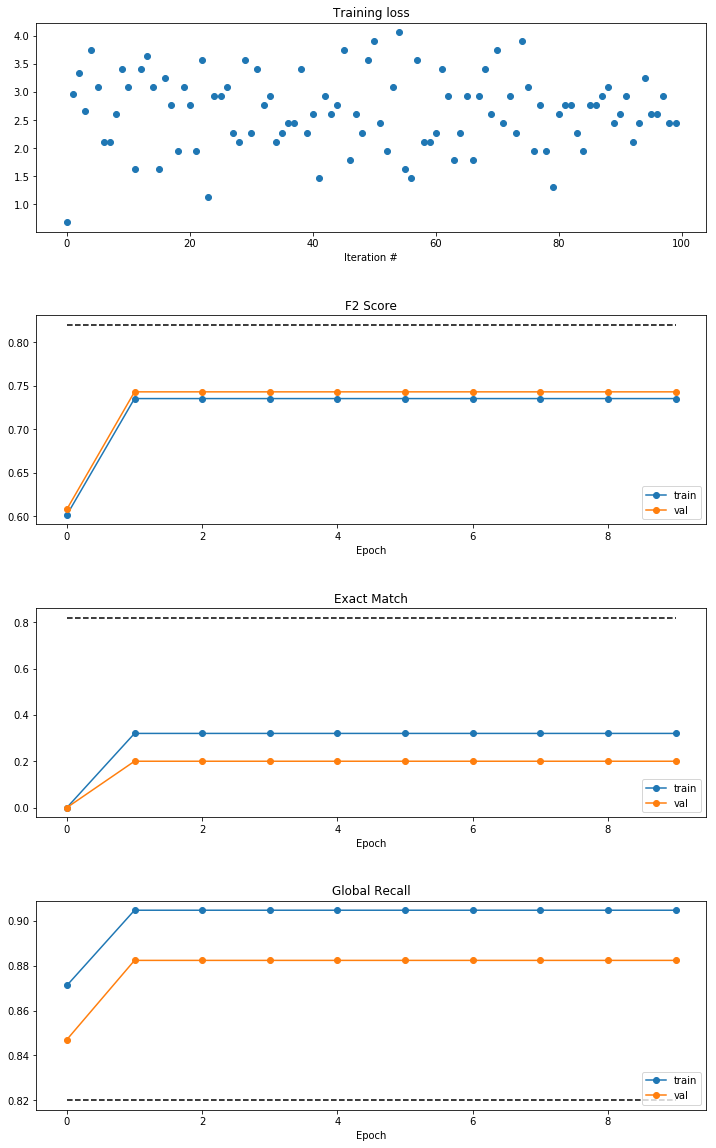

In [84]:
visualize.plot_results(results, config, display=True)

In [85]:
args.test = False
args.bs = 10
args.e = 10
args.nt = 100
args.nv = 10
args.lr = 1e-1
args.gpu = True
args.pe = 100
args.ee = None
args.seed = 231
args.title = "baseline_cnn_tanuj_upsampled_std_nrm"
args.path = "./experiments"
args.checkpoint = ""
args.predict = False
args.save_every = False
args.no_save = False

from utils.layers import Flatten
from torch.autograd import Variable
import copy

def createModel(config):
    model = nn.Sequential(
                      # Conv_Relu_BatchNorm --> 32 x 32
                      nn.Conv2d(3, 32, kernel_size = 7, stride = 2, padding = 2),
                      nn.ReLU(inplace=True),
                      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True),
                      nn.MaxPool2d(4, stride=2),
      
                      # Conv_Relu_BatchNorm_Maxpool --> 32 x 14 x 14
                      nn.Conv2d(32, 32, kernel_size=7, stride=2, padding = 2),
                      nn.ReLU(inplace=True),
                      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True),
                      nn.MaxPool2d(2, stride=2),
      
                      # Aggregation Layers
                      Flatten(), # see above for explanation
                      nn.Linear(7200, 2048), # affine layer
                      nn.ReLU(inplace = False),
                      #nn.Dropout(p=0.45, inplace = False), #don't use dropout until I overfit..
                      nn.Linear(2048, NUM_CLASSES), # affine layer
            )
    model = model.type(config.dtype)


    #check output dimensions before flattening
    #model_gpu = copy.deepcopy(model).type(config.dtype)
    #model_gpu.eval()
    #x = torch.randn(1, 3, 256, 256).type(config.dtype)
    #x_var = Variable(x.type(config.dtype)) # Construct a PyTorch Variable out of your input data
    #scores = model_gpu(x_var)        # Feed it through the model! 
    #print(scores.size())
    return model
#createModel(config)

config = Config(args)
config.log(config)

train_dataset = NaiveDataset(TRAIN_DATA_PATH, TRAIN_LABELS_PATH)
train_idx, val_idx = splitIndices(train_dataset, config, shuffle = False)

eps = 1.
train_sampler = WeightedRandomSampler(weights = w_vec[train_idx]+min(w_vec[train_idx])+eps, num_samples=config.num_train, replacement=False) #THIS IS DIFFERENT
val_sampler = WeightedRandomSampler(weights = w_vec[val_idx]+min(w_vec[val_idx])+eps, num_samples=config.num_val, replacement=False) #THIS IS DIFFERENT.

train_loader = DataLoader(train_dataset, batch_size = config.batch_size, num_workers = 8, sampler = train_sampler)
val_loader = DataLoader(train_dataset, batch_size = config.batch_size, num_workers = 8, sampler = val_sampler)

config.train_loader = train_loader
config.val_loader = val_loader

# Create Model
model = createModel(config)

# Create Loss function
loss_fn = nn.MultiLabelSoftMarginLoss().type(config.dtype)

# Train and Eval Model
results = train(model, config, loss_fn=loss_fn)

Config for experiment:   baseline_cnn_tanuj_upsampled_std_nrm_0601_23.35.10
	title: baseline_cnn_tanuj_upsampled_std_nrm
	gpu: True
	epochs: 10
	batch_size: 10
	learning_rate: 0.1
	num_train (if None using all): 100
	num_val (if None using all): 10

	save_dest: ./experiments/baseline_cnn_tanuj_upsampled_std_nrm_0601_23.35.10
	print_every: 100
	eval_every: None

40479
Number of model parameters: 14837553


Starting epoch 1 / 10
Finished Epoch 1/10
Evaluating...
F2 score {train} : Got 73.51
Global recall {train} : Got 1538 / 1700 correct (90.47)
All or none acc {train} : Got 32 / 100 correct (32.00)
F2 score {val} : Got 74.29
Global recall {val} : Got 150 / 170 correct (88.24)
All or none acc {val} : Got 2 / 10 correct (20.00)
Saving checkpoint...baseline_cnn_tanuj_upsampled_std_nrm_0601_23.35.10_1.ckpt
New best model: baseline_cnn_tanuj_upsampled_std_nrm_0601_23.35.10_1.ckpt with Val F2:  0.7428904428904428
Done saving checkpoint.

Starting epoch 2 / 10
Finished Epoch 2/10
Evaluating...

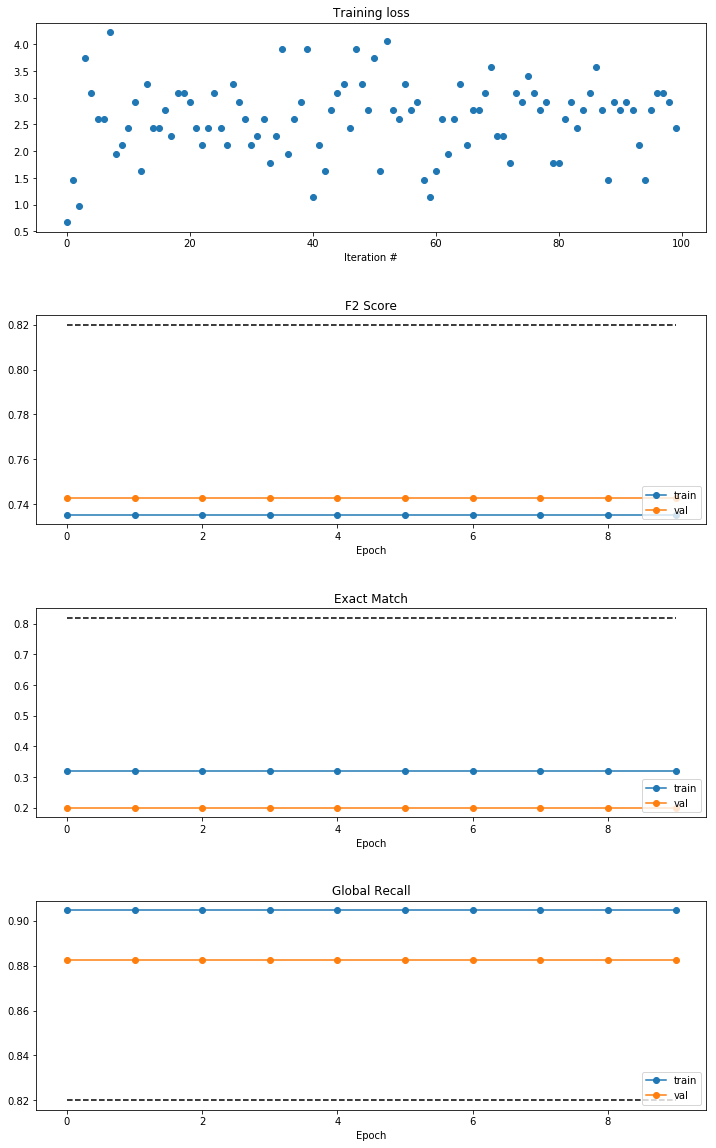

In [86]:
visualize.plot_results(results, config, display=True)

Config for experiment:   baseline_cnn_tanuj_upsampled_std_nrm_0601_23.41.23
	title: baseline_cnn_tanuj_upsampled_std_nrm
	gpu: True
	epochs: 100
	batch_size: 10
	learning_rate: 0.001
	num_train (if None using all): 100
	num_val (if None using all): 10

	save_dest: ./experiments/baseline_cnn_tanuj_upsampled_std_nrm_0601_23.41.23
	print_every: 100
	eval_every: None

40479
Number of model parameters: 14837553


Starting epoch 1 / 100
Finished Epoch 1/100
Evaluating...
F2 score {train} : Got 76.38
Global recall {train} : Got 1547 / 1700 correct (91.00)
All or none acc {train} : Got 39 / 100 correct (39.00)
F2 score {val} : Got 60.38
Global recall {val} : Got 145 / 170 correct (85.29)
All or none acc {val} : Got 2 / 10 correct (20.00)
Saving checkpoint...baseline_cnn_tanuj_upsampled_std_nrm_0601_23.41.23_1.ckpt
New best model: baseline_cnn_tanuj_upsampled_std_nrm_0601_23.41.23_1.ckpt with Val F2:  0.6038461538461539
Done saving checkpoint.

Starting epoch 2 / 100
Finished Epoch 2/100
Evalua

/home/cs231n/myVE35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


F2 score {val} : Got 56.47
Global recall {val} : Got 141 / 170 correct (82.94)
All or none acc {val} : Got 0 / 10 correct (0.00)
Saving checkpoint...baseline_cnn_tanuj_upsampled_std_nrm_0601_23.41.23_4.ckpt

Starting epoch 5 / 100
Finished Epoch 5/100
Evaluating...
F2 score {train} : Got 45.34
Global recall {train} : Got 1447 / 1700 correct (85.12)
All or none acc {train} : Got 10 / 100 correct (10.00)
F2 score {val} : Got 29.91
Global recall {val} : Got 136 / 170 correct (80.00)
All or none acc {val} : Got 0 / 10 correct (0.00)
Saving checkpoint...baseline_cnn_tanuj_upsampled_std_nrm_0601_23.41.23_5.ckpt

Starting epoch 6 / 100
Finished Epoch 6/100
Evaluating...
F2 score {train} : Got 53.81
Global recall {train} : Got 1417 / 1700 correct (83.35)
All or none acc {train} : Got 7 / 100 correct (7.00)
F2 score {val} : Got 45.84
Global recall {val} : Got 132 / 170 correct (77.65)
All or none acc {val} : Got 0 / 10 correct (0.00)
Saving checkpoint...baseline_cnn_tanuj_upsampled_std_nrm_0601

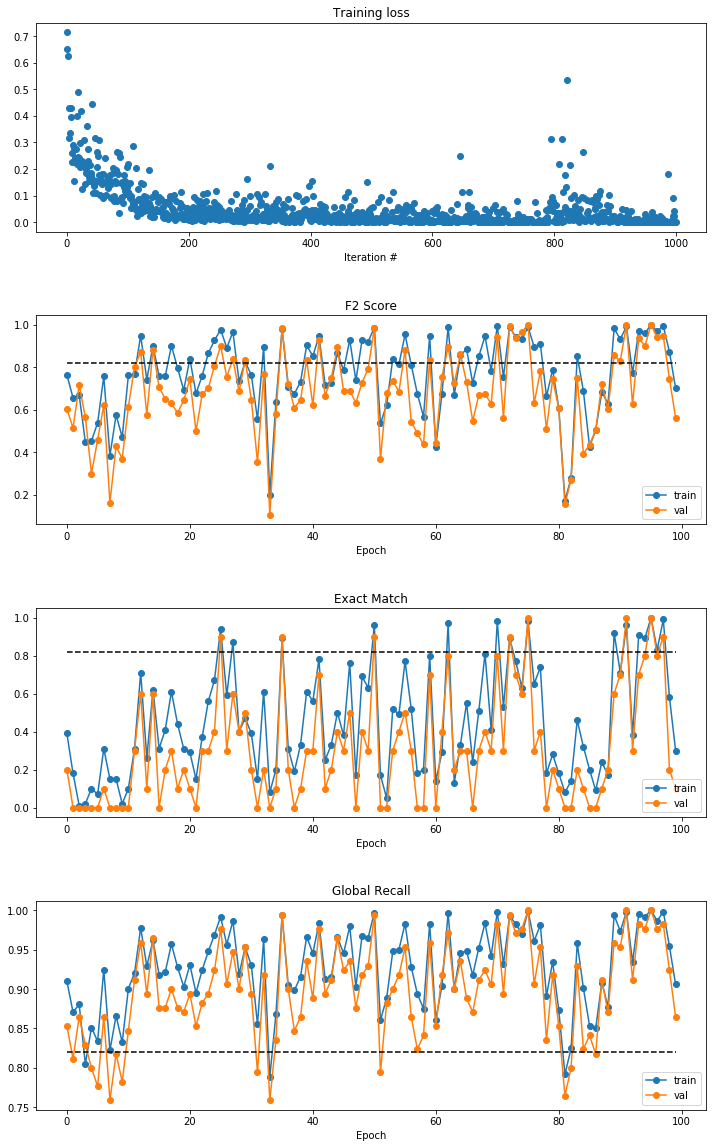

In [87]:
args.test = False
args.bs = 10
args.e = 100
args.nt = 100
args.nv = 10
args.lr = 1e-3
args.gpu = True
args.pe = 20
args.ee = None
args.seed = 231
args.title = "baseline_cnn_tanuj_upsampled_std_nrm"
args.path = "./experiments"
args.checkpoint = ""
args.predict = False
args.save_every = 25
args.no_save = False

from utils.layers import Flatten
from torch.autograd import Variable
import copy

def createModel(config):
    model = nn.Sequential(
                      # Conv_Relu_BatchNorm --> 32 x 32
                      nn.Conv2d(3, 32, kernel_size = 7, stride = 2, padding = 2),
                      nn.ReLU(inplace=True),
                      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True),
                      nn.MaxPool2d(4, stride=2),
      
                      # Conv_Relu_BatchNorm_Maxpool --> 32 x 14 x 14
                      nn.Conv2d(32, 32, kernel_size=7, stride=2, padding = 2),
                      nn.ReLU(inplace=True),
                      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True),
                      nn.MaxPool2d(2, stride=2),
      
                      # Aggregation Layers
                      Flatten(), # see above for explanation
                      nn.Linear(7200, 2048), # affine layer
                      nn.ReLU(inplace = False),
                      #nn.Dropout(p=0.45, inplace = False), #don't use dropout until I overfit..
                      nn.Linear(2048, NUM_CLASSES), # affine layer
            )
    model = model.type(config.dtype)


    #check output dimensions before flattening
    #model_gpu = copy.deepcopy(model).type(config.dtype)
    #model_gpu.eval()
    #x = torch.randn(1, 3, 256, 256).type(config.dtype)
    #x_var = Variable(x.type(config.dtype)) # Construct a PyTorch Variable out of your input data
    #scores = model_gpu(x_var)        # Feed it through the model! 
    #print(scores.size())
    return model
#createModel(config)

config = Config(args)
config.log(config)

train_dataset = NaiveDataset(TRAIN_DATA_PATH, TRAIN_LABELS_PATH)
train_idx, val_idx = splitIndices(train_dataset, config, shuffle = False)

eps = 1.
train_sampler = WeightedRandomSampler(weights = w_vec[train_idx]+min(w_vec[train_idx])+eps, num_samples=config.num_train, replacement=False) #THIS IS DIFFERENT
val_sampler = WeightedRandomSampler(weights = w_vec[val_idx]+min(w_vec[val_idx])+eps, num_samples=config.num_val, replacement=False) #THIS IS DIFFERENT.

train_loader = DataLoader(train_dataset, batch_size = config.batch_size, num_workers = 8, sampler = train_sampler)
val_loader = DataLoader(train_dataset, batch_size = config.batch_size, num_workers = 8, sampler = val_sampler)

config.train_loader = train_loader
config.val_loader = val_loader

# Create Model
model = createModel(config)

# Create Loss function
loss_fn = nn.MultiLabelSoftMarginLoss().type(config.dtype)

# Train and Eval Model
results = train(model, config, loss_fn=loss_fn)

#visualize
visualize.plot_results(results, config, display=True)

# DISCUSSION
First time I got a decreasing loss curve and near perfect training F2 score
Things I did
reduce dropout entirely. Only introduce regularization once overfitting becomes a problem
upsample rarer classes. I got the optimal distribution by doing basic linear algebra least squares projection (see sketch later)
standard normalize inputs per color channel
Run for 100 epochs (instead of just 10) so we see examples a ton
Increase stride size and kernel size to reduce first affine layer input to 7200

Config for experiment:   baseline_cnn_tanuj_upsampled_std_nrm_full_0602_00.27.54
	title: baseline_cnn_tanuj_upsampled_std_nrm_full
	gpu: True
	epochs: 10
	batch_size: 10
	learning_rate: 0.001
	num_train (if None using all): 32000
	num_val (if None using all): 8000

	save_dest: ./experiments/baseline_cnn_tanuj_upsampled_std_nrm_full_0602_00.27.54
	print_every: 250
	eval_every: None

40479
Number of model parameters: 14837553


Starting epoch 1 / 10
t = 250, loss = 0.2236
t = 500, loss = 0.2117
t = 750, loss = 0.1991
t = 1000, loss = 0.2415
t = 1250, loss = 0.2237
t = 1500, loss = 0.1985
t = 1750, loss = 0.2332
t = 2000, loss = 0.1421
t = 2250, loss = 0.0953
t = 2500, loss = 0.2163
t = 2750, loss = 0.2731
t = 3000, loss = 0.2085
Finished Epoch 1/10
Evaluating...
F2 score {train} : Got 55.30
Global recall {train} : Got 465441 / 544000 correct (85.56)
All or none acc {train} : Got 2168 / 32000 correct (6.78)


/home/cs231n/myVE35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1115: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in samples with no true labels.
  'recall', 'true', average, warn_for)


F2 score {val} : Got 55.27
Global recall {val} : Got 116402 / 136000 correct (85.59)
All or none acc {val} : Got 538 / 8000 correct (6.73)
Saving checkpoint...baseline_cnn_tanuj_upsampled_std_nrm_full_0602_00.27.54_1.ckpt
New best model: baseline_cnn_tanuj_upsampled_std_nrm_full_0602_00.27.54_1.ckpt with Val F2:  0.5526663546345721
Done saving checkpoint.

Starting epoch 2 / 10
t = 250, loss = 0.2563
t = 500, loss = 0.1540
t = 750, loss = 0.2138
t = 1000, loss = 0.2180
t = 1250, loss = 0.1011
t = 1500, loss = 0.1646
t = 1750, loss = 0.1463
t = 2000, loss = 0.2018
t = 2250, loss = 0.1462
t = 2500, loss = 0.1970
t = 2750, loss = 0.2088
t = 3000, loss = 0.1326
Finished Epoch 2/10
Evaluating...
F2 score {train} : Got 78.57
Global recall {train} : Got 498588 / 544000 correct (91.65)
All or none acc {train} : Got 13139 / 32000 correct (41.06)
F2 score {val} : Got 78.89
Global recall {val} : Got 124794 / 136000 correct (91.76)
All or none acc {val} : Got 3309 / 8000 correct (41.36)
Saving che

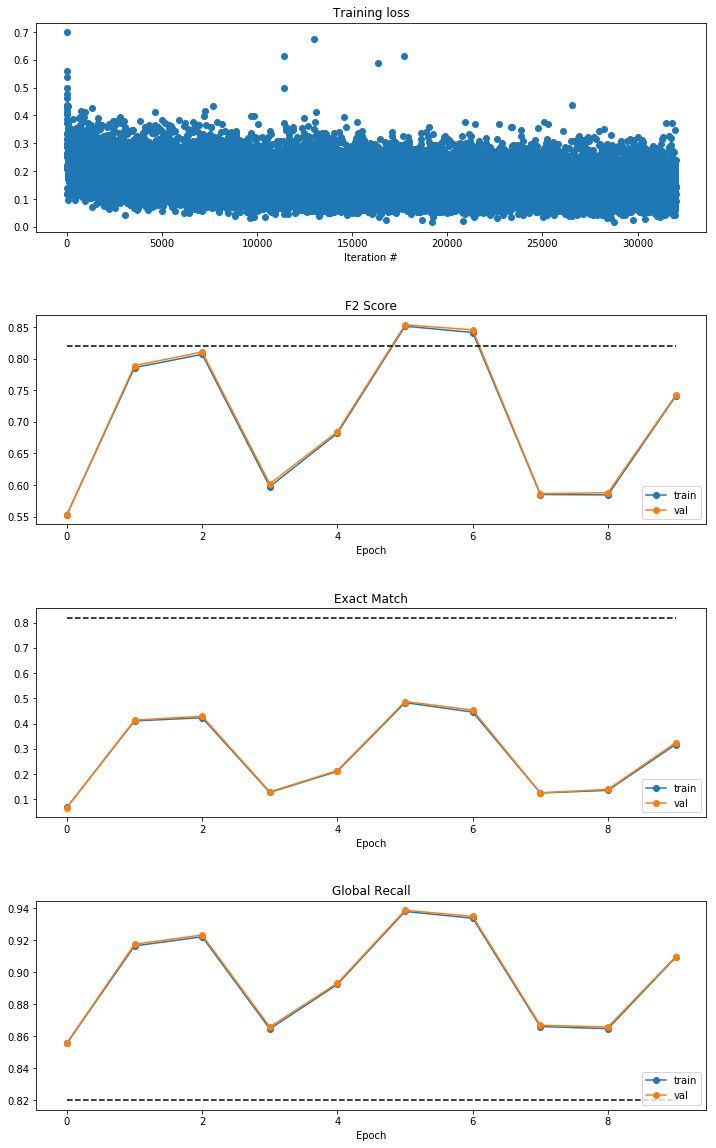

In [ ]:
args.test = False
args.bs = 10
args.e = 10
args.nt = 32000
args.nv = 8000
args.lr = 1e-3
args.gpu = True
args.pe = 250
args.ee = None
args.seed = 231
args.title = "baseline_cnn_tanuj_upsampled_std_nrm_full"
args.path = "./experiments"
args.checkpoint = ""
args.predict = False
args.save_every = 5
args.no_save = False

from utils.layers import Flatten
from torch.autograd import Variable
import copy
from utils.config import Config

def createModel(config):
    model = nn.Sequential(
                      # Conv_Relu_BatchNorm --> 32 x 32
                      nn.Conv2d(3, 32, kernel_size = 7, stride = 2, padding = 2),
                      nn.ReLU(inplace=True),
                      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True),
                      nn.MaxPool2d(4, stride=2),
      
                      # Conv_Relu_BatchNorm_Maxpool --> 32 x 14 x 14
                      nn.Conv2d(32, 32, kernel_size=7, stride=2, padding = 2),
                      nn.ReLU(inplace=True),
                      nn.BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True),
                      nn.MaxPool2d(2, stride=2),
      
                      # Aggregation Layers
                      Flatten(), # see above for explanation
                      nn.Linear(7200, 2048), # affine layer
                      nn.ReLU(inplace = False),
                      #nn.Dropout(p=0.45, inplace = False), #don't use dropout until I overfit..
                      nn.Linear(2048, NUM_CLASSES), # affine layer
            )
    model = model.type(config.dtype)


    #check output dimensions before flattening
    #model_gpu = copy.deepcopy(model).type(config.dtype)
    #model_gpu.eval()
    #x = torch.randn(1, 3, 256, 256).type(config.dtype)
    #x_var = Variable(x.type(config.dtype)) # Construct a PyTorch Variable out of your input data
    #scores = model_gpu(x_var)        # Feed it through the model! 
    #print(scores.size())
    return model
#createModel(config)

config = Config(args)
config.log(config)

train_dataset = NaiveDataset(TRAIN_DATA_PATH, TRAIN_LABELS_PATH)
train_idx, val_idx = splitIndices(train_dataset, config, shuffle = True)

eps = 1.
train_sampler = WeightedRandomSampler(weights = w_vec[train_idx]+min(w_vec[train_idx])+eps, num_samples=config.num_train, replacement=False) #THIS IS DIFFERENT
val_sampler = WeightedRandomSampler(weights = w_vec[val_idx]+min(w_vec[val_idx])+eps, num_samples=config.num_val, replacement=False) #THIS IS DIFFERENT.

train_loader = DataLoader(train_dataset, batch_size = config.batch_size, num_workers = 8, sampler = train_sampler)
val_loader = DataLoader(train_dataset, batch_size = config.batch_size, num_workers = 8, sampler = val_sampler)

config.train_loader = train_loader
config.val_loader = val_loader

# Create Model
model = createModel(config)

# Create Loss function
loss_fn = nn.MultiLabelSoftMarginLoss().type(config.dtype)

# Train and Eval Model
results = train(model, config, loss_fn=loss_fn)

#visualize
visualize.plot_results(results, config, display=True)

# Run on the best model (best val f2 score of .85 at epoch 5)

In [7]:
# Load Model
args.test = False
args.bs = 10
args.e = 10
args.nt = 32000
args.nv = 8000
args.lr = 1e-3
args.gpu = True
args.pe = 250
args.ee = None
args.seed = 231
args.title = "baseline_cnn_tanuj_upsampled_std_nrm_full"
args.path = "./experiments"
args.checkpoint = "./experiments/baseline_cnn_tanuj_upsampled_std_nrm_full_0602_00.27.54/checkpoints/baseline_cnn_tanuj_upsampled_std_nrm_full_0602_00.27.54_5.ckpt"
args.predict = True
args.save_every = 5
args.no_save = True

config = Config(args)
config.log(config)

#get train/val data
train_dataset = NaiveDataset(TRAIN_DATA_PATH, TRAIN_LABELS_PATH)
train_idx, val_idx = splitIndices(train_dataset, config, shuffle = True)

#get w_vec
M_cpu = train_dataset.labels_tensor.cpu().numpy()
w_vec, res = np.linalg.lstsq(M_cpu.T,np.ones((17,)))[0:2]

#make train/val samplers & loaders
eps = 1.
train_sampler = WeightedRandomSampler(weights = w_vec[train_idx]+min(w_vec[train_idx])+eps, num_samples=config.num_train, replacement=False) #THIS IS DIFFERENT
val_sampler = WeightedRandomSampler(weights = w_vec[val_idx]+min(w_vec[val_idx])+eps, num_samples=config.num_val, replacement=False) #THIS IS DIFFERENT.

train_loader = DataLoader(train_dataset, batch_size = config.batch_size, num_workers = 8, sampler = train_sampler)
val_loader = DataLoader(train_dataset, batch_size = config.batch_size, num_workers = 8, sampler = val_sampler)

config.train_loader = train_loader
config.val_loader = val_loader

#get test data
test_dataset = NaiveDataset(TEST_DATA_PATH, TEST_LABELS_PATH)
test_loader = DataLoader(test_dataset, batch_size = config.batch_size, shuffle = False, num_workers = 8)

model = createModel(config)

make_predictions = True
if make_predictions:
    predict(model,config,test_loader,dataset="test")
    predict(model, config, train_loader, dataset = "train")
    predict(model, config, val_loader, dataset = "val")

Config for experiment:   baseline_cnn_tanuj_upsampled_std_nrm_full_0602_01.35.24
	title: baseline_cnn_tanuj_upsampled_std_nrm_full
	gpu: True
	epochs: 10
	batch_size: 10
	learning_rate: 0.001
	num_train (if None using all): 32000
	num_val (if None using all): 8000

	save_dest: ./experiments/baseline_cnn_tanuj_upsampled_std_nrm_full_0602_01.35.24
	save_every: 5
	print_every: 250
	eval_every: None

40479
61191
Predicting on test
0
5
10
15
20
25
30
35
40
45
50
55
60
65
70
75
80
85
90
95
100
105
110
115
120
125
130
135
140
145
150
155
160
165
170
175
180
185
190
195
200
205
210
215
220
225
230
235
240
245
250
255
260
265
270
275
280
285
290
295
300
305
310
315
320
325
330
335
340
345
350
355
360
365
370
375
380
385
390
395
400
405
410
415
420
425
430
435
440
445
450
455
460
465
470
475
480
485
490
495
500
505
510
515
520
525
530
535
540
545
550
555
560
565
570
575
580
585
590
595
600
605
610
615
620
625
630
635
640
645
650
655
660
665
670
675
680
685
690
695
700
705
710
715
720
725
730
735

In [8]:
val_df = pd.read_csv('./experiments/baseline_cnn_tanuj_upsampled_std_nrm_full_0602_01.35.24/logs/submission_tt_v3_val.csv')
val_df[0:10]

,image_name,tags,labels
0,train_1638,artisinal_mine blow_down habitation primary se...,clear primary
1,train_7430,blow_down habitation primary selective_logging,clear habitation primary
2,train_2638,blow_down habitation primary selective_logging,clear primary
3,train_2252,blow_down habitation primary selective_logging,agriculture clear cultivation primary selectiv...
4,train_2362,blow_down habitation primary selective_logging,clear primary
5,train_4587,agriculture blow_down habitation primary selec...,cloudy
6,train_5076,blow_down habitation primary selective_logging,clear primary
7,train_1779,blow_down habitation primary,clear primary water
8,train_2971,blow_down habitation primary selective_logging,clear primary
9,train_5953,agriculture artisinal_mine blow_down habitatio...,partly_cloudy primary
